# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

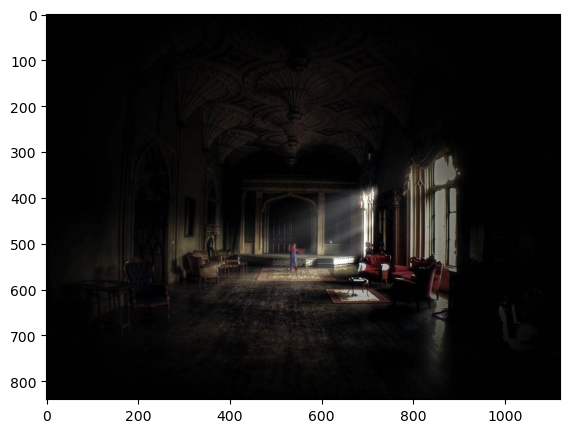

In [134]:
img = cv2.imread('data/image_1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

(<Axes: >, <matplotlib.image.AxesImage at 0x317d53f50>)

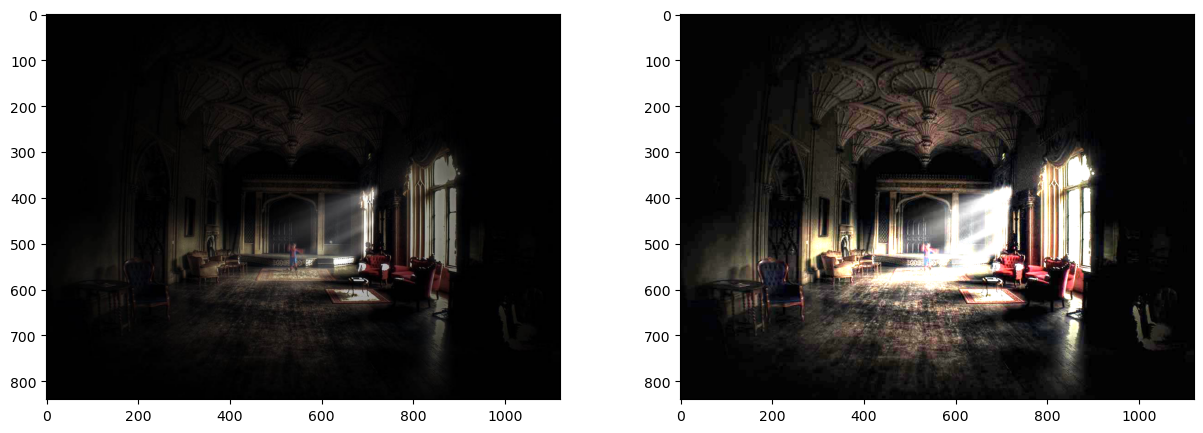

In [136]:
# Define white patch and the coefficients
row, col = 410, 650 
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Gray world
This algorithm assumes that a scene, on average, is gray.

100.59627741037242
[0.7653185767536496, 1.0059627741037243, 1.4300381832569713]


(<Axes: >, <matplotlib.image.AxesImage at 0x317df47a0>)

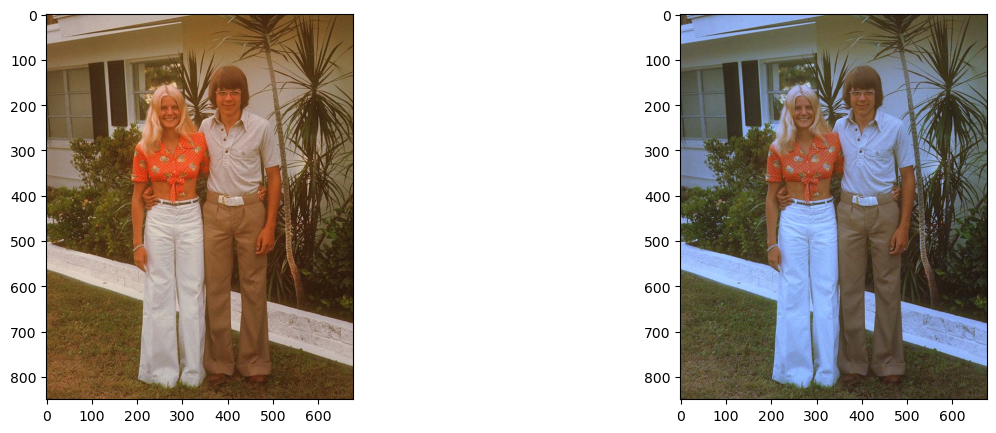

In [138]:
# Load your image
img = cv2.imread('data/image_2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(img[:, :, 0])
mean_g = np.mean(img[:, :, 1])
mean_b = np.mean(img[:, :, 2])
mean_gray = (mean_r + mean_g + mean_b) / 3.0
print(mean_gray)

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
kr = mean_gray / mean_r
kg = mean_gray / mean_g
kb = mean_gray / mean_b

coeffs = [kr, kg, kb]
print(coeffs)

# # Apply color balancing and generate the balanced image
balanced = img.astype(np.float32) * coeffs
balanced /= 255
balanced = np.clip(balanced, 0, 1)

# # Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

244.0 214.0 206.0


(<Axes: >, <matplotlib.image.AxesImage at 0x317c247a0>)

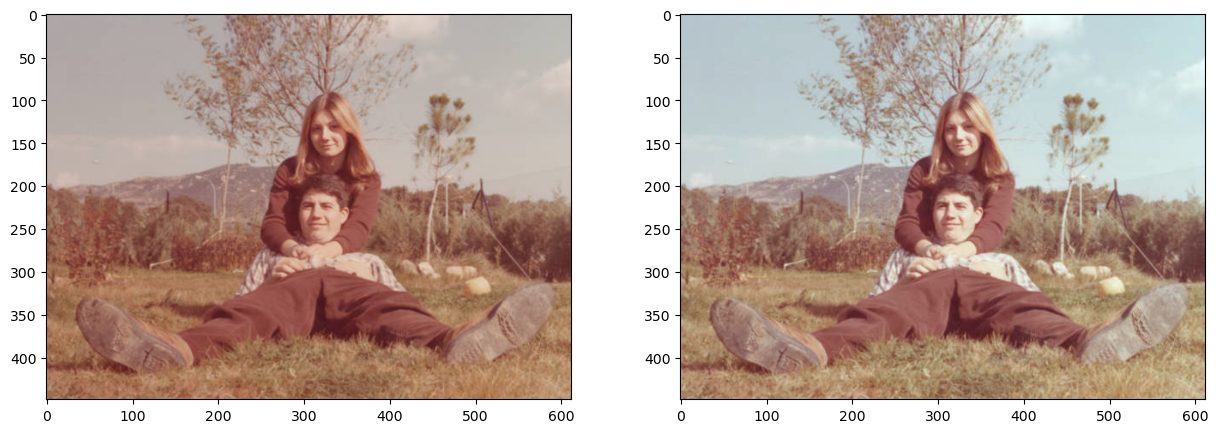

In [140]:
# Load your image
img = cv2.imread('data/image_3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_float = img.astype(np.float32)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(img_float[:, :, 0])
max_g = np.max(img_float[:, :, 1])
max_b = np.max(img_float[:, :, 2])

print(max_r, max_g, max_b)

# Apply scale-by-max balancing and generate the balanced image
balanced = img_float / np.array([max_r, max_g, max_b])
balanced = np.clip(balanced, 0, 1)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)